# Classification

## Logistic Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mooc = pd.read_csv("ICE4_Data.csv")
mooc

,certified,forum.posts,grade,assignment
0,no,7,3,9
1,no,7,4,1
2,yes,191,8,19
3,yes,130,10,18
4,yes,135,8,18
...,...,...,...,...
995,yes,88,10,13
996,yes,153,10,19
997,no,41,4,3
998,no,47,6,12


In [3]:
mooc['certified'].value_counts()

yes    725
no     275
Name: certified, dtype: int64

In [4]:
mooc.describe()

,forum.posts,grade,assignment
count,1000.000000,1000.00000,1000.000000
mean,113.107000,7.76500,13.693000
std,55.126477,2.38232,5.011973
min,1.000000,1.00000,1.000000
25%,72.750000,8.00000,12.000000
50%,118.500000,8.00000,15.000000
75%,160.000000,9.00000,17.000000
max,200.000000,10.00000,20.000000


In [5]:
import seaborn as sns

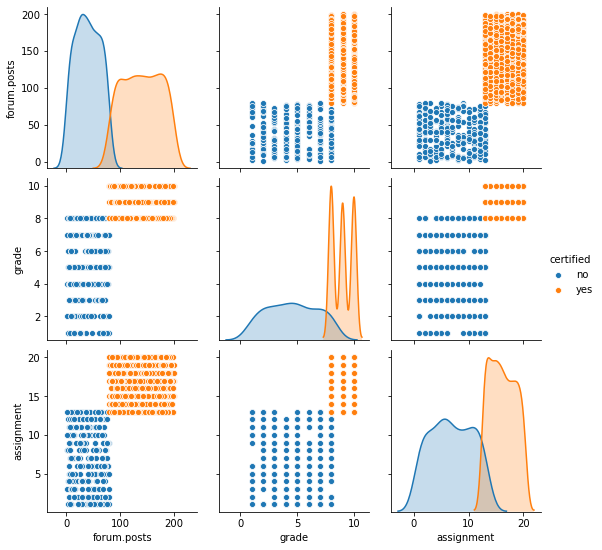

In [6]:
sns.pairplot(mooc, hue = "certified")

Whther certified is related to forum posts, grade and assignment

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
dummy = pd.get_dummies(mooc['certified'], prefix = 'certified') # Here prefix = 'certified' will create new column names
dummy

,certified_no,certified_yes
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
995,0,1
996,0,1
997,1,0
998,1,0


In [9]:
moocD = pd.concat([mooc, dummy], axis=1)
moocD = moocD.drop(['certified', 'certified_no'], axis=1)
moocD

,forum.posts,grade,assignment,certified_yes
0,7,3,9,0
1,7,4,1,0
2,191,8,19,1
3,130,10,18,1
4,135,8,18,1
...,...,...,...,...
995,88,10,13,1
996,153,10,19,1
997,41,4,3,0
998,47,6,12,0


In [10]:
Xs = moocD[["forum.posts", "grade", "assignment"]].to_numpy()
certified = moocD.loc[:,"certified_yes"].values.reshape(-1, 1)

In [13]:
moocLogitModel1 = LogisticRegression()
moocLogitModel1.fit(Xs, certified)

/Users/shelly/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [14]:
moocLogitModel1.intercept_

array([-63.13291439])

In [15]:
moocLogitModel1.coef_

array([[0.62419697, 0.52270711, 0.85766257]])

In [16]:
import statsmodels.api as sm

moocLogitModel2 = sm.Logit(certified, Xs)
moocLogitModel2Fit = moocLogitModel2.fit()
print(moocLogitModel2Fit.summary())

Optimization terminated successfully.
         Current function value: 22.457768
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Mon, 18 Oct 2021   Pseudo R-squ.:                     inf
Time:                        17:09:25   Log-Likelihood:                -22458.
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0378      0.003     10.852      0.000       0.031       0.045
x2            -0.3202      0

/Users/shelly/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/Users/shelly/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/Users/shelly/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:3409: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


## Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

Xs_tree = mooc.drop('certified', axis = 1)
certified = mooc['certified']

In [18]:
moocTreeModel = DecisionTreeClassifier()
moocTreeModel.fit(Xs_tree, certified)

DecisionTreeClassifier()

In [19]:
from sklearn import tree
text_representation = tree.export_text(moocTreeModel)
print(text_representation)

|--- feature_0 <= 79.50
|   |--- class: no
|--- feature_0 >  79.50
|   |--- feature_1 <= 7.50
|   |   |--- class: no
|   |--- feature_1 >  7.50
|   |   |--- class: yes



[Text(133.92000000000002, 181.2, 'forum.posts <= 79.5\ngini = 0.399\nsamples = 1000\nvalue = [275, 725]\nclass = no'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 271\nvalue = [271, 0]\nclass = no'),
 Text(200.88000000000002, 108.72, 'grade <= 7.5\ngini = 0.011\nsamples = 729\nvalue = [4, 725]\nclass = no'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = no'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 725\nvalue = [0, 725]\nclass = no')]

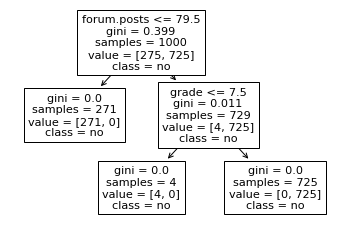

In [20]:
tree.plot_tree(moocTreeModel,
              feature_names = ["forum.posts", "grade", "assignment"], # This is optional. Just let the plot know the features name.
                class_names = mooc.certified # This is also optional. Read more information in the documentation.
              )

## Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

Xs_NB = mooc.drop('certified', axis = 1)
certified = mooc['certified']

In [22]:
moocNBModel = GaussianNB()
moocNBModel.fit(Xs_NB, certified)

GaussianNB()

In [23]:
certified_pred = moocNBModel.predict(Xs_NB)
performance = [item in certified_pred for item in certified]
print('The accuracy is', sum(performance)/len(performance)*100, '%')

The accuracy is 100.0 %


## Model Evaluation